# Correlation analysis of complexity measures

We drop all measures with a Spearman or Pearson correlation coefficient >= 0.95 to another measure.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [2]:
full_data = pd.read_csv("lhb_corpus_v2_all_measures.txt", sep="\t", header=0, index_col=0)

In [3]:
data = full_data.copy()
data.drop(columns=["type_token_ratio_ci", "guiraud_r_ci", "herdan_c_ci", "dugast_k_ci", "maas_a2_ci", "dugast_u_ci", "tuldava_ln_ci", "brunet_w_ci", "cttr_ci", "summer_s_ci", "sichel_s_ci", "michea_m_ci", "honore_h_ci", "herdan_vm_ci", "entropy_ci", "yule_k_ci", "simpson_d_ci", "hdd_ci", "mtld_ci", "word_length_char_stdev", "word_length_syll_stdev", "dependency_distance_stdev", "closeness_centrality_stdev", "outdegree_centralization_stdev", "closeness_centralization_stdev", "average_sentence_length_stdev", "average_sentence_length_char_stdev", "average_sentence_length_syll_stdev", "dependents_per_word_stdev", "longest_shortest_path_stdev", "punctuation_per_sentence_stdev", "t_units_stdev", "t_units_length_stdev", "complex_t_units_stdev", "complex_t_units_length_stdev", "clauses_stdev", "clauses_length_stdev", "dependent_clauses_stdev", "dependent_clauses_length_stdev", "nps_stdev", "nps_length_stdev", "vps_stdev", "vps_length_stdev", "pps_stdev", "pps_length_stdev", "coordinate_phrases_stdev", "coordinate_phrases_length_stdev", "constituents_stdev", "constituents_wo_leaves_stdev", "height_stdev"], inplace=True)

## Lexical complexity

In [4]:
lexical = data[["type_token_ratio", "guiraud_r", "herdan_c", "dugast_k", "maas_a2", "dugast_u", "tuldava_ln", "brunet_w", "cttr", "summer_s", "sichel_s", "michea_m", "honore_h", "herdan_vm", "entropy", "yule_k", "simpson_d", "hdd", "mtld", "word_length_char", "word_length_syll"]]

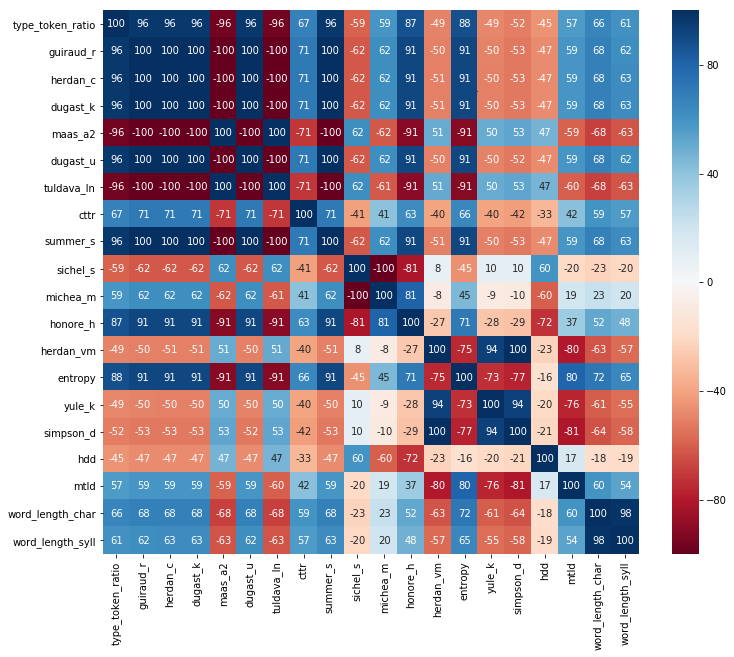

In [5]:
spearman_lexical = lexical.corr(method="spearman") * 100
plt.rcParams['figure.figsize'] = (12.0, 10.0)
sns.heatmap(spearman_lexical, cmap="RdBu", center=0, annot=True, fmt=".0f")

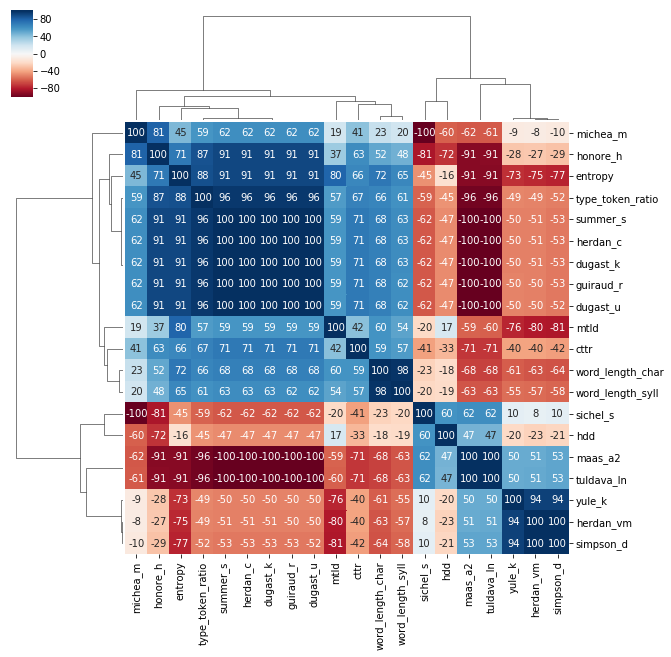

In [6]:
sns.clustermap(spearman_lexical, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average")

Keep only type_token_ratio, sichel_s, honore_h, entropy, yule_k, hdd, mtld and word_length_char.

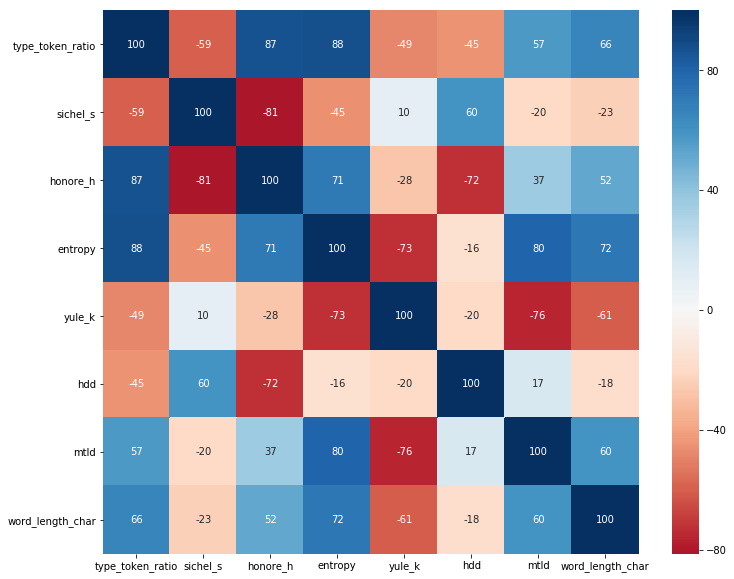

In [7]:
lexical = data[["type_token_ratio", "sichel_s", "honore_h", "entropy", "yule_k", "hdd", "mtld", "word_length_char"]]
spearman_lexical = lexical.corr(method="spearman") * 100
sns.heatmap(spearman_lexical, cmap="RdBu", center=0, annot=True, fmt=".0f")

## Dependency-based complexity

In [8]:
dependency = data[["dependency_distance", "closeness_centrality", "outdegree_centralization", "closeness_centralization", "dependents_per_word", "longest_shortest_path"]]

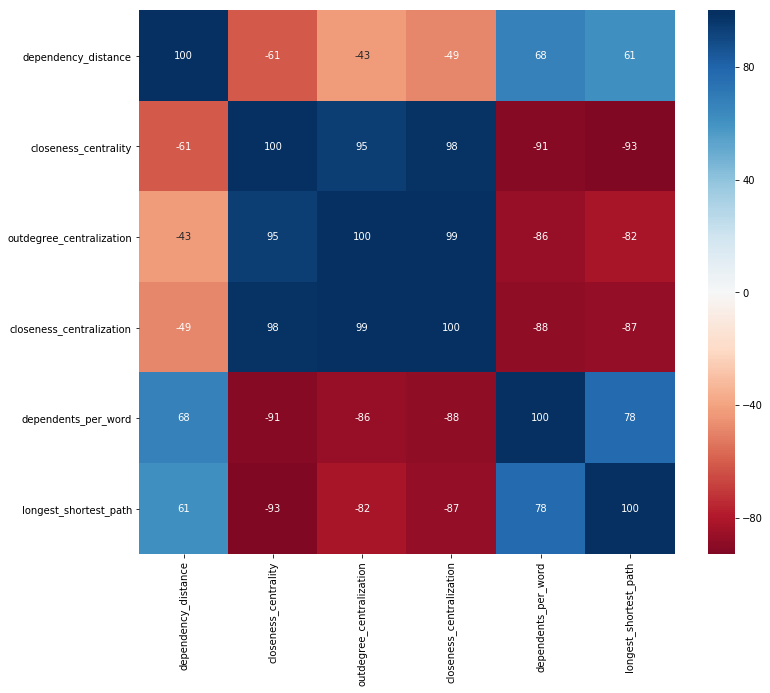

In [9]:
spearman_dependency = dependency.corr(method="spearman") * 100
sns.heatmap(spearman_dependency, cmap="RdBu", center=0, annot=True, fmt=".0f")

Drop closeness_centrality and outdegree_centralization.

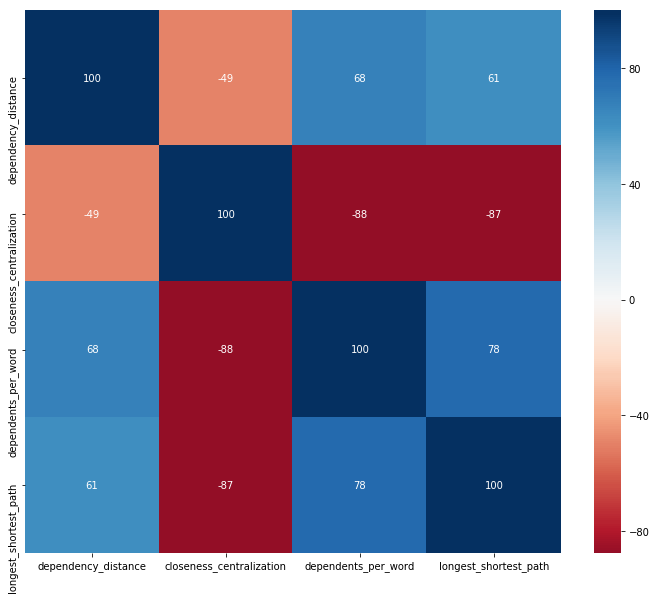

In [10]:
dependency = data[["dependency_distance", "closeness_centralization", "dependents_per_word", "longest_shortest_path"]]
spearman_dependency = dependency.corr(method="spearman") * 100
sns.heatmap(spearman_dependency, cmap="RdBu", center=0, annot=True, fmt=".0f")

## Constituent-based complexity

In [11]:
constituent = data[["t_units", "t_units_length", "complex_t_units", "complex_t_units_length", "clauses", "clauses_length", "dependent_clauses", "dependent_clauses_length", "nps", "nps_length", "vps", "vps_length", "pps", "pps_length", "coordinate_phrases", "coordinate_phrases_length", "constituents", "constituents_wo_leaves", "height"]]

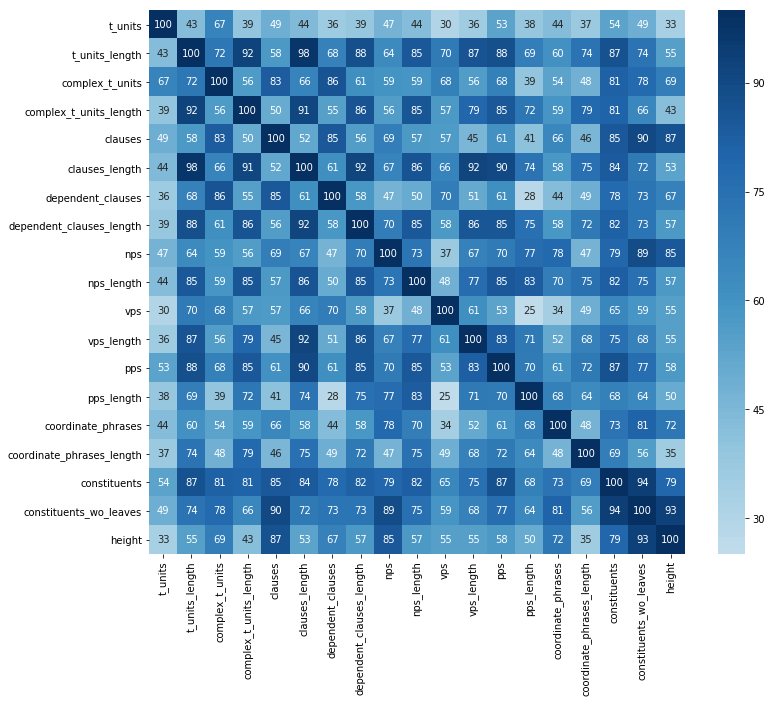

In [12]:
spearman_constituent = constituent.corr(method="spearman") * 100
sns.heatmap(spearman_constituent, cmap="RdBu", center=0, annot=True, fmt=".0f")

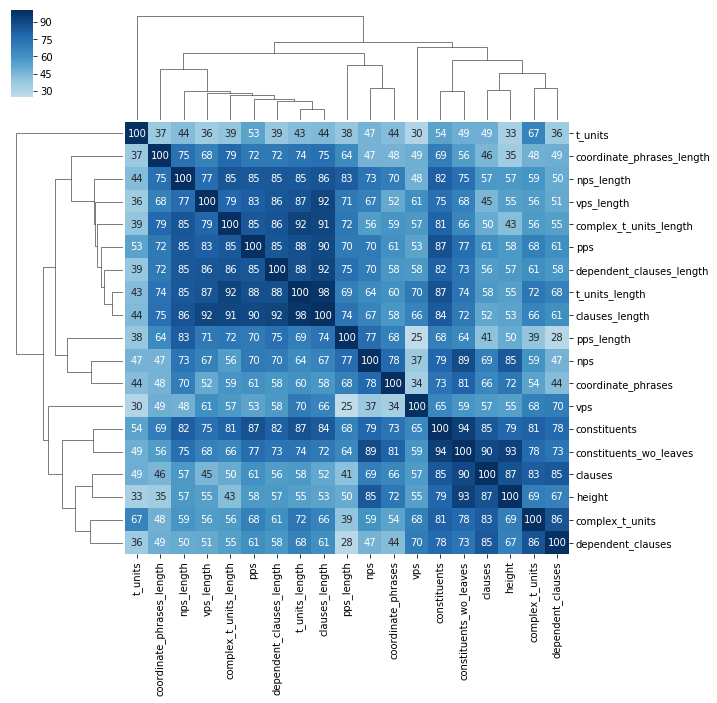

In [13]:
sns.clustermap(spearman_constituent, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average")

Drop t_units_length.

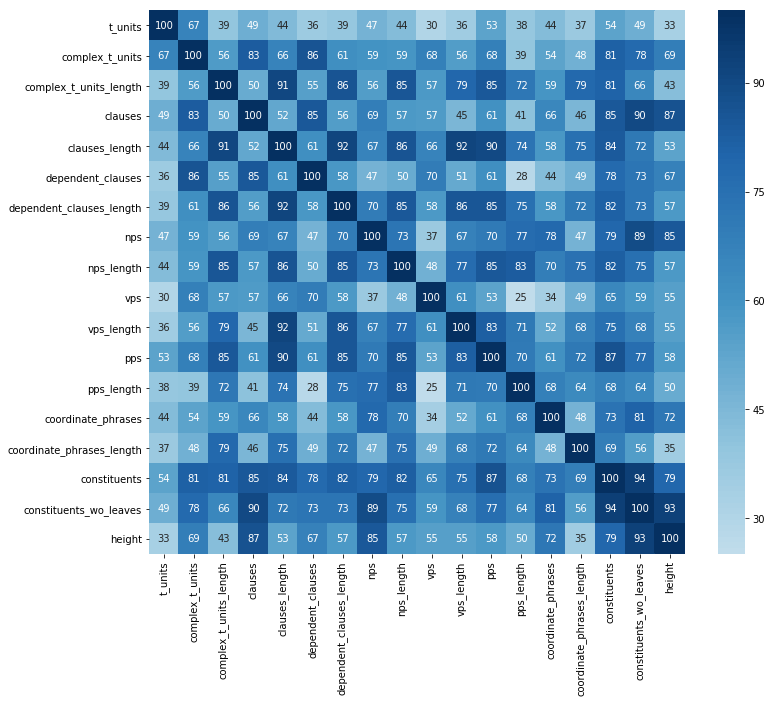

In [14]:
constituent = data[["t_units", "complex_t_units", "complex_t_units_length", "clauses", "clauses_length", "dependent_clauses", "dependent_clauses_length", "nps", "nps_length", "vps", "vps_length", "pps", "pps_length", "coordinate_phrases", "coordinate_phrases_length", "constituents", "constituents_wo_leaves", "height"]]
spearman_constituent = constituent.corr(method="spearman") * 100
sns.heatmap(spearman_constituent, cmap="RdBu", center=0, annot=True, fmt=".0f")

## Shallow measures for syntactic complexity

In [15]:
shallow = data[["average_sentence_length", "average_sentence_length_char", "average_sentence_length_syll", "punctuation_per_sentence"]]

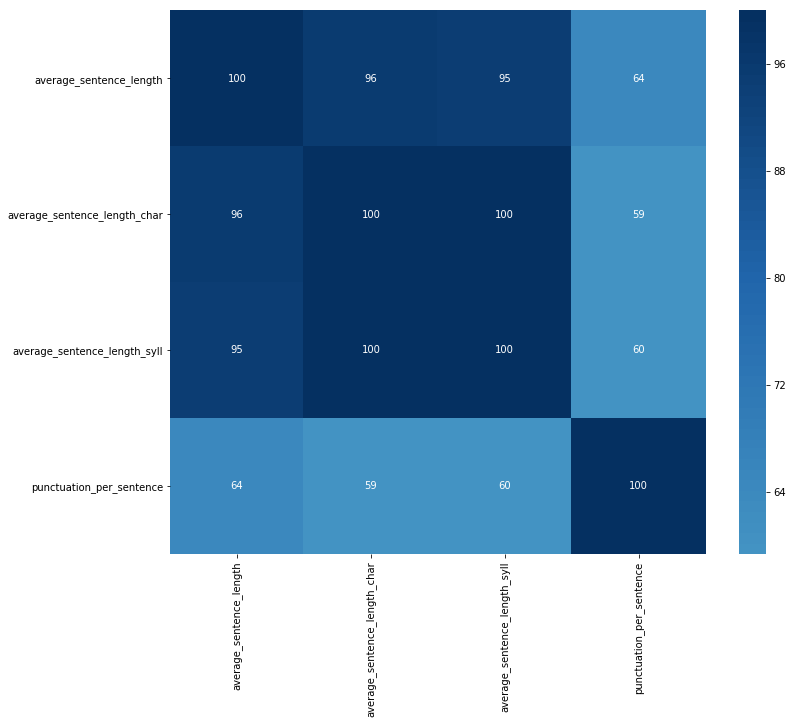

In [16]:
spearman_shallow = shallow.corr(method="spearman") * 100
sns.heatmap(spearman_shallow, cmap="RdBu", center=0, annot=True, fmt=".0f")

Drop average_sentence_length_char and average_sentence_length_syll.

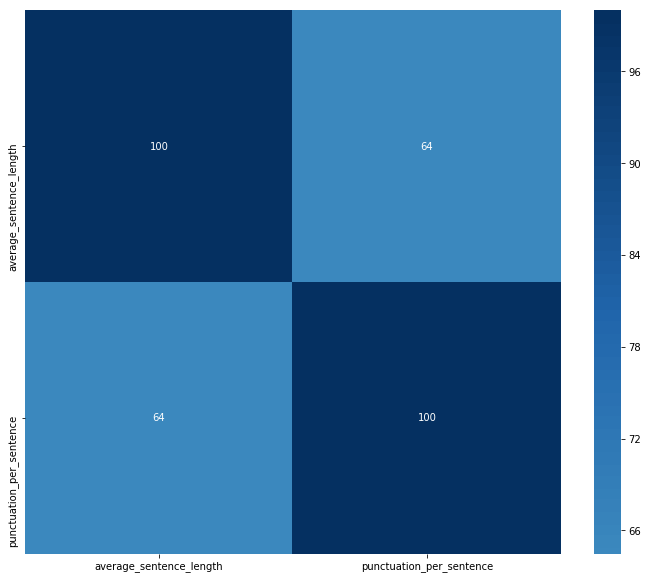

In [17]:
shallow = data[["average_sentence_length", "punctuation_per_sentence"]]
spearman_shallow = shallow.corr(method="spearman") * 100
sns.heatmap(spearman_shallow, cmap="RdBu", center=0, annot=True, fmt=".0f")

## Combine all measures

In [18]:
combination = pd.concat((lexical, dependency, constituent, shallow), axis=1)

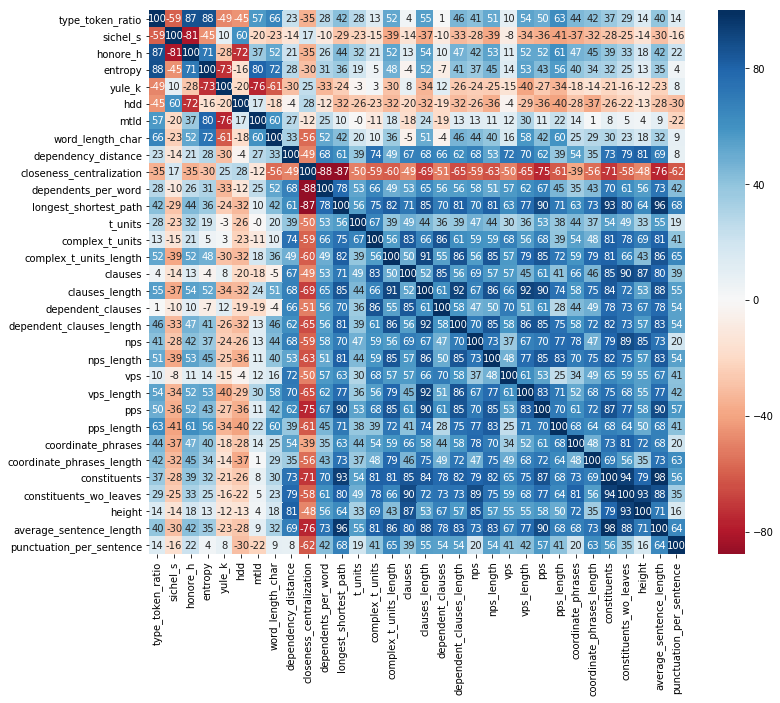

In [19]:
spearman_combination = combination.corr(method="spearman") * 100
sns.heatmap(spearman_combination, cmap="RdBu", center=0, annot=True, fmt=".0f")

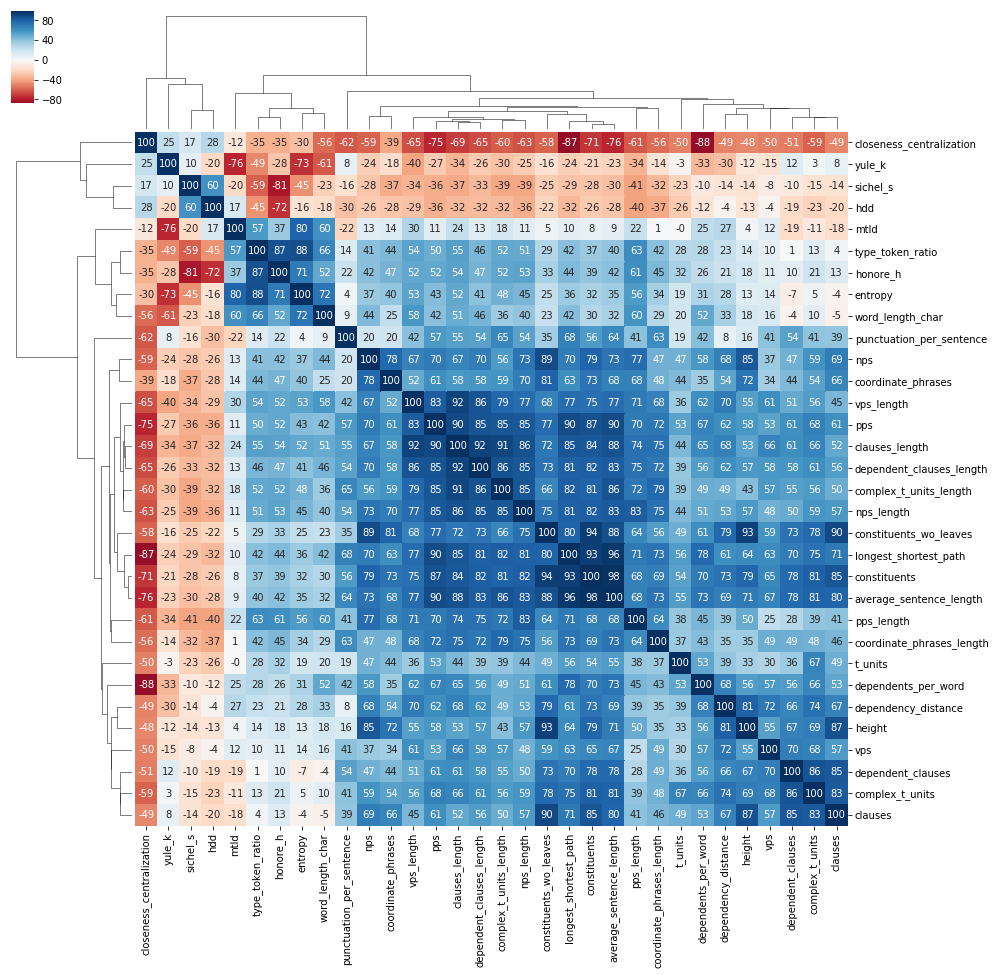

In [20]:
sns.clustermap(spearman_combination, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average", figsize=(15, 15))

Drop longest_shortest_path and constituents.

In [21]:
combination.drop(columns=["longest_shortest_path", "constituents"], inplace=True)

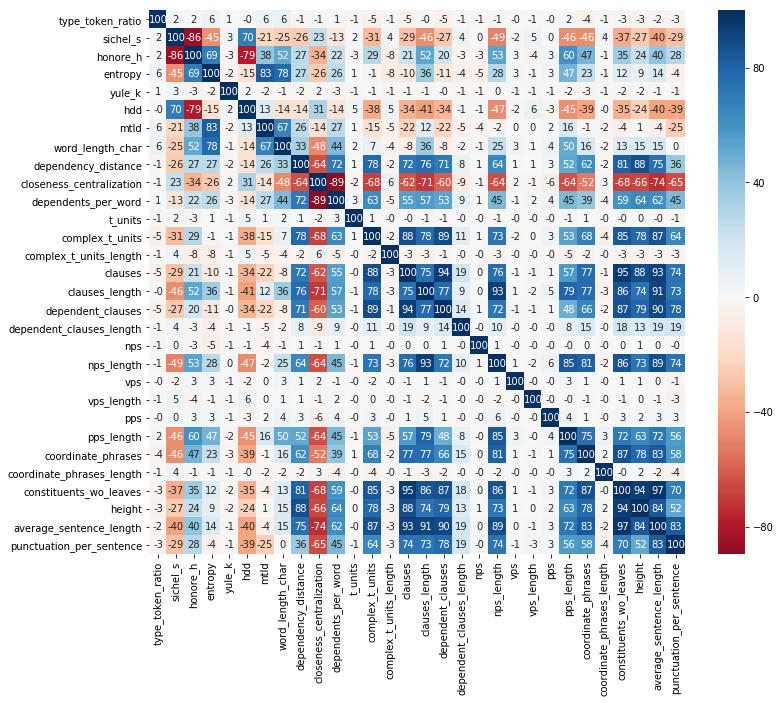

In [22]:
pearson_combination = combination.corr(method="pearson") * 100
sns.heatmap(pearson_combination, cmap="RdBu", center=0, annot=True, fmt=".0f")

Drop constituents_wo_leaves.

In [23]:
combination.drop(columns=["constituents_wo_leaves"], inplace=True)

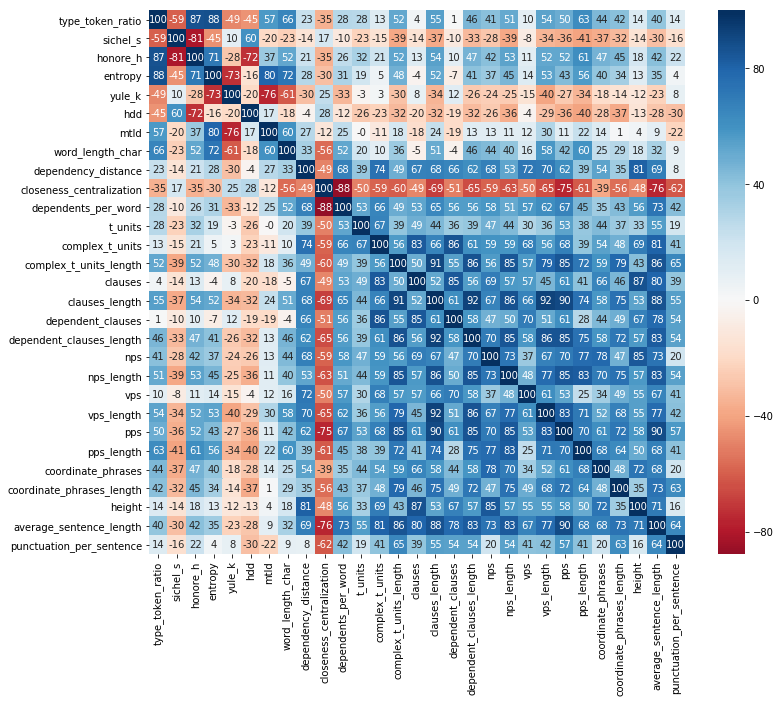

In [24]:
spearman_combination = combination.corr(method="spearman") * 100
sns.heatmap(spearman_combination, cmap="RdBu", center=0, annot=True, fmt=".0f")

## Dimensionality reduction

First we standardize the data.

In [25]:
zscores = (combination - combination.mean(axis=0)) / combination.std(axis=0)

How many components?

best n_components by PCA CV = 3
best n_components by PCA MLE = 28


Text(0.5, 1.0, 'Model selection')

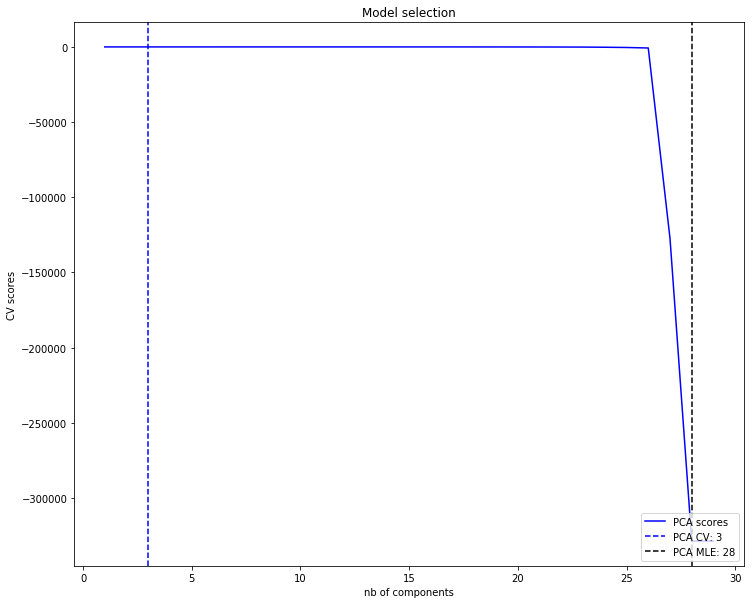

In [26]:
def compute_scores(X):
    pca = PCA(svd_solver='full')
    pca_scores = []
    for n in n_components:
        pca.n_components = n
        pca_scores.append(np.mean(cross_val_score(pca, X, cv=5)))
    return pca_scores


n_components = np.arange(1, zscores.shape[1] + 1)

pca_scores = compute_scores(zscores.values)
n_components_pca = n_components[np.argmax(pca_scores)]

pca = PCA(svd_solver='full', n_components='mle')
pca.fit(zscores.values)
n_components_pca_mle = pca.n_components_

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

plt.figure()
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.axvline(n_components_pca, color='b', label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_pca_mle, color='k', label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')

plt.xlabel('nb of components')
plt.ylabel('CV scores')
plt.legend(loc='lower right')
plt.title("Model selection")

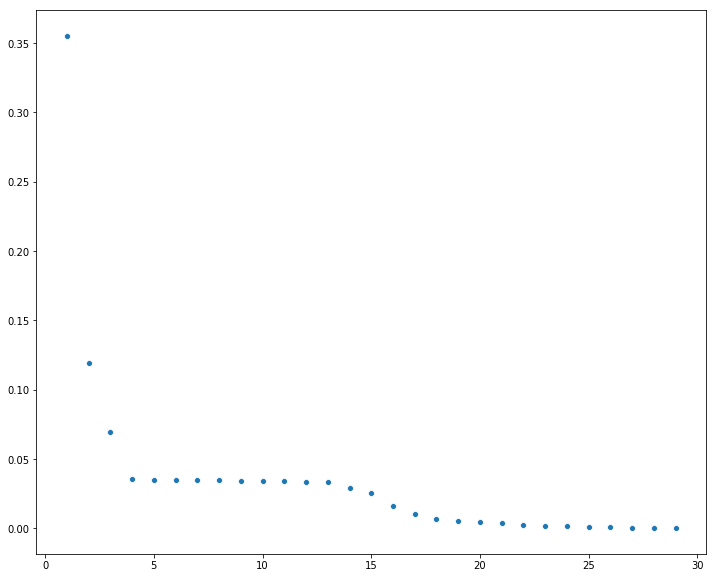

In [27]:
pca = PCA(svd_solver="full")
pca.fit(zscores.values)
sns.scatterplot(x=n_components, y=pca.explained_variance_ratio_)

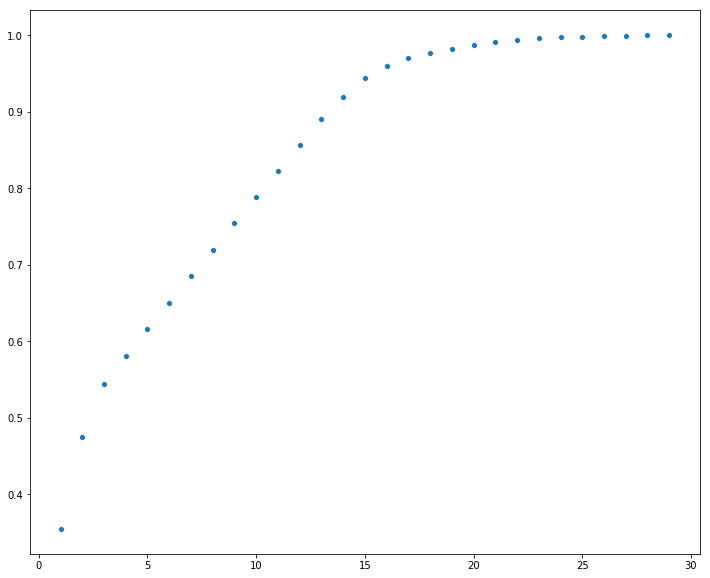

In [28]:
sns.scatterplot(x=n_components, y=np.cumsum(pca.explained_variance_ratio_))

Let's use 4 components.

In [29]:
pca = PCA(4, svd_solver="full")
pca.fit(zscores.values)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.3553262  0.11953428 0.06972469 0.0358792 ]
[102.77193858  59.60835824  45.52544795  32.65745398]


In [30]:
reduced = pca.transform(zscores.values)

In [31]:
combi_plus_pca = zscores.copy()
combi_plus_pca["pca1"] = reduced[:, 0]
combi_plus_pca["pca2"] = reduced[:, 1]
combi_plus_pca["pca3"] = reduced[:, 2]
combi_plus_pca["pca4"] = reduced[:, 3]

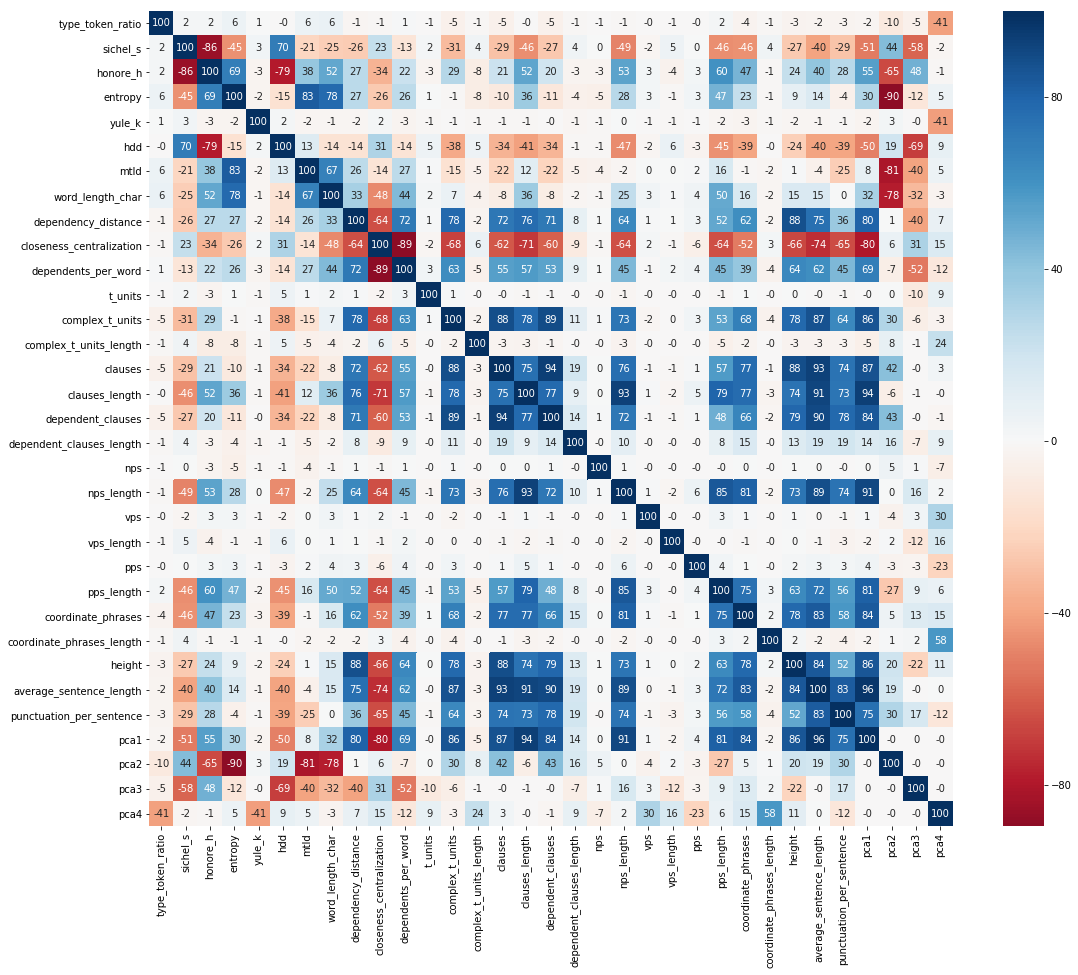

In [32]:
pearson_correlations = combi_plus_pca.corr(method="pearson") * 100
plt.rcParams['figure.figsize'] = (18.0, 15.0)
sns.heatmap(pearson_correlations, cmap="RdBu", center=0, annot=True, fmt=".0f")

Components correspond to: average_sentence_length, entropy, (hdd + dependents_per_word), (coordinate_phrase_length + type_token_ration + yule_k)

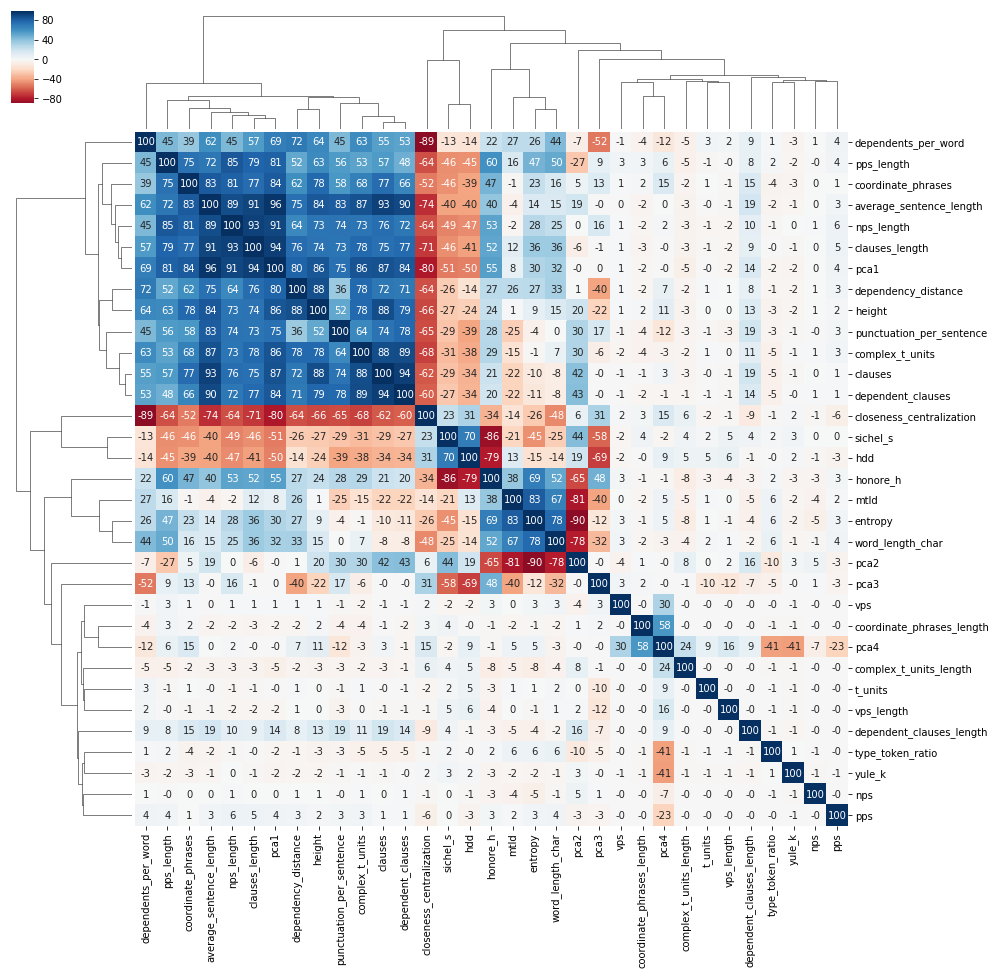

In [33]:
sns.clustermap(pearson_correlations, cmap="RdBu", center=0, annot=True, fmt=".0f", method="average", figsize=(15, 15))

The measures identified above fall nicely into the clusters.

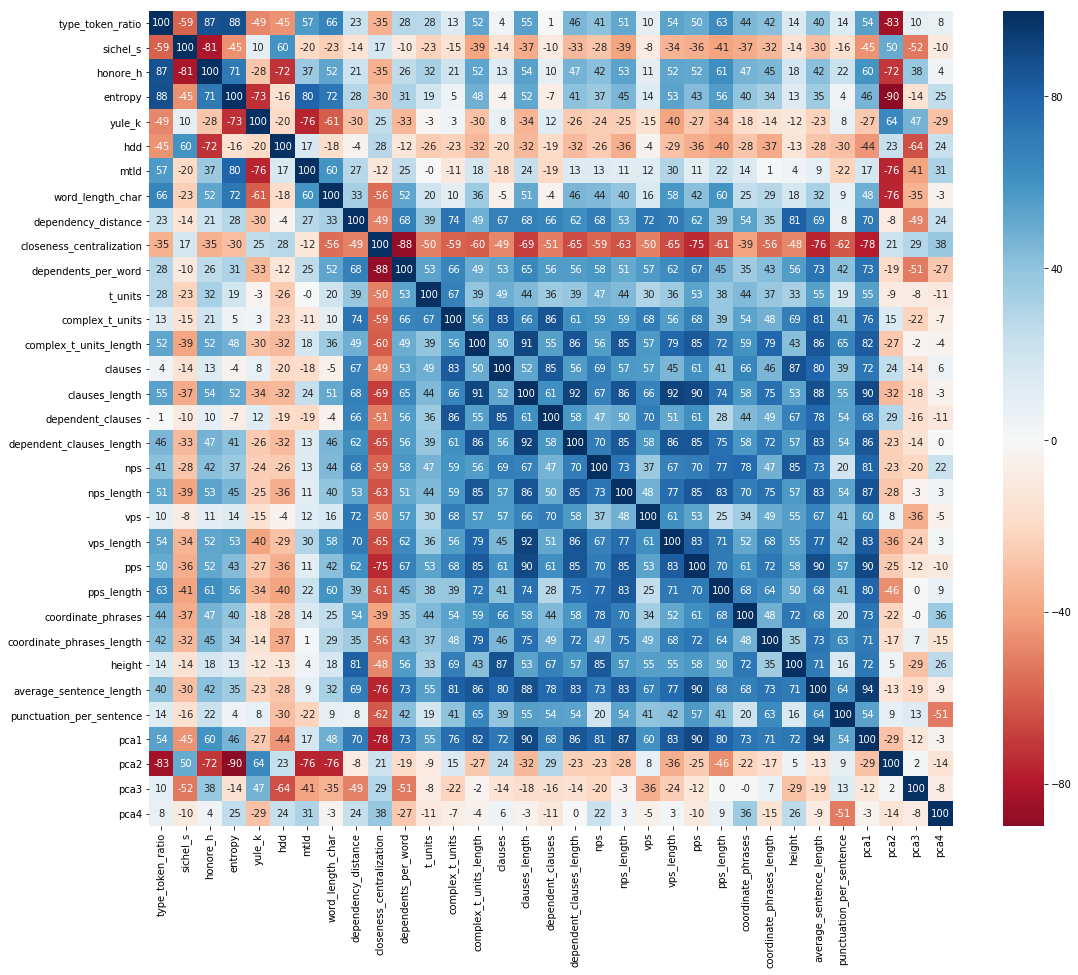

In [34]:
spearman_correlations = combi_plus_pca.corr(method="spearman") * 100
plt.rcParams['figure.figsize'] = (18.0, 15.0)
sns.heatmap(spearman_correlations, cmap="RdBu", center=0, annot=True, fmt=".0f")

For components 1–3, the rank correlations give the same picture. Component 4 is more closely related to punctuation_per_sentence.

In [35]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings = pd.DataFrame(loadings, index=zscores.columns, columns=["pca1", "pca2", "pca3", "pca4"])

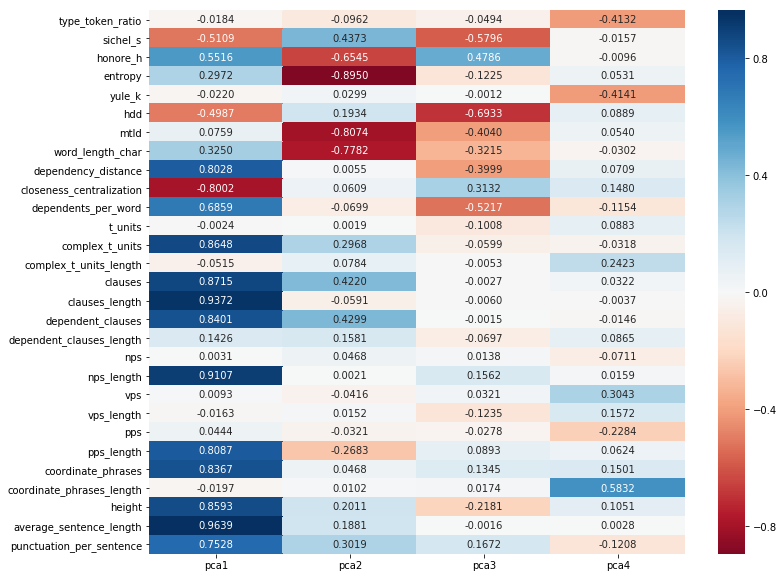

In [36]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
sns.heatmap(loadings, cmap="RdBu", center=0, annot=True, fmt=".4f")

NB: Loadings are simply the correlations between components and features ;o).